In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
import os
import math
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
sns.set(color_codes=True)

In [3]:
for num in range(0,112):
    df = pd.read_csv("/Users/nandhitharaghuram/Desktop/DS4A/Project/Data/daily_dataset/block_"+str(num)+".csv")
    df = df[['day','LCLid','energy_sum','energy_median','energy_mean','energy_max','energy_count','energy_std','energy_min']]
    df.reset_index()
    df.to_csv("/Users/nandhitharaghuram/Desktop/DS4A/Project/Data/blocks/hc_"+str(num)+".csv")


In [4]:
fout= open("energy.csv","a")
# first file:
for line in open("/Users/nandhitharaghuram/Desktop/DS4A/Project/Data/blocks/hc_0.csv"):
    fout.write(line)
# now the rest:    
for num in range(0,112):
    f = open("/Users/nandhitharaghuram/Desktop/DS4A/Project/Data/blocks/hc_"+str(num)+".csv")
    f.readline() # skip the header
    for line in f:
         fout.write(line)
    f.close()
fout.close()

In [5]:
energy = pd.read_csv('energy.csv')
energy

,Unnamed: 0,day,LCLid,energy_sum,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_min
0,0,2012-10-12,MAC000002,7.098,0.1385,0.154304,0.886,46,0.196034,0.000
1,1,2012-10-13,MAC000002,11.087,0.1800,0.230979,0.933,48,0.192329,0.076
2,2,2012-10-14,MAC000002,13.223,0.1580,0.275479,1.085,48,0.274647,0.070
3,3,2012-10-15,MAC000002,10.257,0.1310,0.213688,1.164,48,0.224483,0.070
4,4,2012-10-16,MAC000002,9.769,0.1450,0.203521,0.991,48,0.184115,0.087
...,...,...,...,...,...,...,...,...,...,...
3536002,9903,2014-02-24,MAC004828,2.587,0.0225,0.053896,0.722,48,0.125341,0.000
3536003,9904,2014-02-25,MAC004828,0.720,0.0050,0.015000,0.051,48,0.017029,0.000
3536004,9905,2014-02-26,MAC004828,1.051,0.0110,0.021896,0.152,48,0.030538,0.000
3536005,9906,2014-02-27,MAC004828,0.736,0.0045,0.015333,0.092,48,0.020424,0.000


In [6]:
household=pd.read_csv('/Users/nandhitharaghuram/Desktop/DS4A/Project/Data/informations_households.csv')
household

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0
...,...,...,...,...,...
5561,MAC002056,Std,ACORN-U,ACORN-U,block_111
5562,MAC004587,Std,ACORN-U,ACORN-U,block_111
5563,MAC004828,Std,ACORN-U,ACORN-U,block_111
5564,MAC001704,ToU,ACORN-U,ACORN-U,block_111


In [7]:
acron_dataset = pd.read_csv("/Users/nandhitharaghuram/Desktop/DS4A/Project/Data/Acorn_cleaned_percentage - Acorn_cleaned_percentage.csv")
acron_dataset

,Acorn,electricity,recycle,water,adult,child,elderly,attitude,car_0,car_1,...,60k-80k,80k-100k,<20k,>100k,average_level,internet_high,internet_low,internet_med,not_tv,tv
0,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0,0.011593,0.039859,...,0.117647,0.174914,0.011150,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048
1,ACORN-B,0.059651,0.063011,0.064790,0.051596,0.057692,0.067270,0,0.013105,0.028722,...,0.111176,0.142117,0.017606,0.179169,0.094712,0.064831,0.031960,0.035387,0.058083,0.065398
2,ACORN-C,0.061723,0.062427,0.063618,0.048461,0.047776,0.093213,0,0.012097,0.050996,...,0.078824,0.079402,0.038146,0.070696,0.067984,0.059667,0.049423,0.048493,0.050072,0.055886
3,ACORN-D,0.055062,0.062865,0.059513,0.071266,0.050781,0.031373,0,0.104839,0.055686,...,0.100000,0.120253,0.025235,0.144091,0.085997,0.067699,0.018451,0.022280,0.077825,0.063020
4,ACORN-E,0.058022,0.058926,0.061566,0.064282,0.064303,0.035596,0,0.059476,0.058617,...,0.089412,0.092060,0.032277,0.082029,0.073213,0.065404,0.025041,0.036697,0.076109,0.067182
5,ACORN-F,0.062463,0.067095,0.063911,0.050741,0.051683,0.078733,0,0.024194,0.046307,...,0.066471,0.057537,0.045775,0.039935,0.059849,0.059094,0.049753,0.053080,0.045780,0.052319
6,ACORN-G,0.060539,0.060823,0.061272,0.054732,0.059796,0.062142,1,0.015625,0.047479,...,0.083529,0.080552,0.035211,0.064220,0.068565,0.061388,0.042175,0.060288,0.056080,0.057669
7,ACORN-H,0.060983,0.059802,0.059513,0.055160,0.060998,0.060332,0,0.023185,0.055686,...,0.071176,0.062140,0.042840,0.043173,0.061592,0.059667,0.051071,0.062254,0.054649,0.067776
8,ACORN-I,0.065275,0.060968,0.063031,0.044612,0.039062,0.121267,1,0.023690,0.075615,...,0.034118,0.024166,0.076878,0.012952,0.043579,0.050488,0.093904,0.060288,0.034907,0.051130
9,ACORN-J,0.059651,0.059947,0.061566,0.062286,0.064303,0.041629,0,0.024194,0.060961,...,0.073529,0.063291,0.041080,0.042094,0.062173,0.062536,0.035255,0.057667,0.065236,0.065398


In [8]:
energy = energy[energy.energy_count == 48].dropna()
start_date=datetime(year=2012,month=1,day=23)
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d')
energy=energy.loc[energy["day"]>=start_date,['LCLid','day','energy_sum']].reset_index(drop=True)
energy.head()

,LCLid,day,energy_sum
0,MAC000002,2012-10-13,11.087
1,MAC000002,2012-10-14,13.223
2,MAC000002,2012-10-15,10.257
3,MAC000002,2012-10-16,9.769
4,MAC000002,2012-10-17,10.885


In [10]:
acorn_merge = energy[['LCLid','energy_sum']].merge(household[['LCLid','Acorn']],on='LCLid').merge(acron_dataset,on='Acorn')

In [12]:
acorn_merge

,LCLid,energy_sum,Acorn,electricity,recycle,water,adult,child,elderly,attitude,...,60k-80k,80k-100k,<20k,>100k,average_level,internet_high,internet_low,internet_med,not_tv,tv
0,MAC000002,11.087,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0,...,0.117647,0.174914,0.011150,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048
1,MAC000002,13.223,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0,...,0.117647,0.174914,0.011150,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048
2,MAC000002,10.257,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0,...,0.117647,0.174914,0.011150,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048
3,MAC000002,9.769,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0,...,0.117647,0.174914,0.011150,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048
4,MAC000002,10.885,ACORN-A,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0,...,0.117647,0.174914,0.011150,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446481,MAC005567,3.942,ACORN-Q,0.056838,0.050904,0.052477,0.059721,0.071815,0.045852,1,...,0.005882,0.002301,0.127934,0.000540,0.026729,0.051061,0.106425,0.091088,0.057511,0.057669
3446482,MAC005567,4.107,ACORN-Q,0.056838,0.050904,0.052477,0.059721,0.071815,0.045852,1,...,0.005882,0.002301,0.127934,0.000540,0.026729,0.051061,0.106425,0.091088,0.057511,0.057669
3446483,MAC005567,5.762,ACORN-Q,0.056838,0.050904,0.052477,0.059721,0.071815,0.045852,1,...,0.005882,0.002301,0.127934,0.000540,0.026729,0.051061,0.106425,0.091088,0.057511,0.057669
3446484,MAC005567,5.066,ACORN-Q,0.056838,0.050904,0.052477,0.059721,0.071815,0.045852,1,...,0.005882,0.002301,0.127934,0.000540,0.026729,0.051061,0.106425,0.091088,0.057511,0.057669


In [15]:
#Categories - action, environmental groups, tv_on_demand,internet_access,attitude
# 'attitude', 'environment_group', 'tv','internet_high', 
#  'internet_low', 'internet_med','not_tv','water','electricity','recycle'
acorn_merge.columns

Index(['LCLid', 'energy_sum', 'Acorn', 'electricity', 'recycle', 'water',
       'adult', 'child', 'elderly', 'attitude', 'car_0', 'car_1', 'car_2',
       'car_3', 'child_0', 'child_1', 'child_2', 'child_3', 'employed',
       'unemployed', 'environment_group', 'asian', 'black', 'mixed',
       'other_ethnicity', 'white', 'not_saving', 'saving', 'england',
       'northern_ireland', 'scotland', 'wales', 'bed_1', 'bed_2', 'bed_3',
       'bed_4', 'bed_5', 'detached_house', 'flat', '20k-40k', '40k-60k',
       '60k-80k', '80k-100k', '<20k', '>100k', 'average_level',
       'internet_high', 'internet_low', 'internet_med', 'not_tv', 'tv'],
      dtype='object')

In [17]:
df = acorn_merge[['Acorn','energy_sum','attitude', 'environment_group', 'tv','internet_high', 
                  'internet_low', 'internet_med','not_tv','water','electricity','recycle']]
df

,Acorn,energy_sum,attitude,environment_group,tv,internet_high,internet_low,internet_med,not_tv,water,electricity,recycle
0,ACORN-A,11.087,0,1,0.060048,0.064831,0.040198,0.043906,0.060944,0.063031,0.058171,0.064323
1,ACORN-A,13.223,0,1,0.060048,0.064831,0.040198,0.043906,0.060944,0.063031,0.058171,0.064323
2,ACORN-A,10.257,0,1,0.060048,0.064831,0.040198,0.043906,0.060944,0.063031,0.058171,0.064323
3,ACORN-A,9.769,0,1,0.060048,0.064831,0.040198,0.043906,0.060944,0.063031,0.058171,0.064323
4,ACORN-A,10.885,0,1,0.060048,0.064831,0.040198,0.043906,0.060944,0.063031,0.058171,0.064323
...,...,...,...,...,...,...,...,...,...,...,...,...
3446481,ACORN-Q,3.942,1,0,0.057669,0.051061,0.106425,0.091088,0.057511,0.052477,0.056838,0.050904
3446482,ACORN-Q,4.107,1,0,0.057669,0.051061,0.106425,0.091088,0.057511,0.052477,0.056838,0.050904
3446483,ACORN-Q,5.762,1,0,0.057669,0.051061,0.106425,0.091088,0.057511,0.052477,0.056838,0.050904
3446484,ACORN-Q,5.066,1,0,0.057669,0.051061,0.106425,0.091088,0.057511,0.052477,0.056838,0.050904


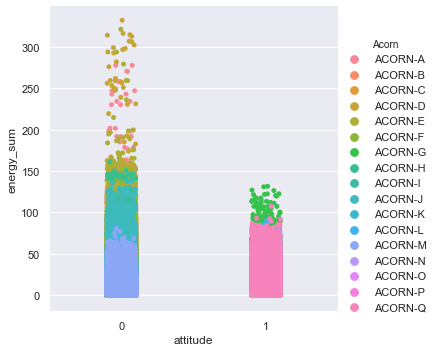

In [20]:
sns.catplot(x="attitude", y="energy_sum", hue="Acorn", data=df)

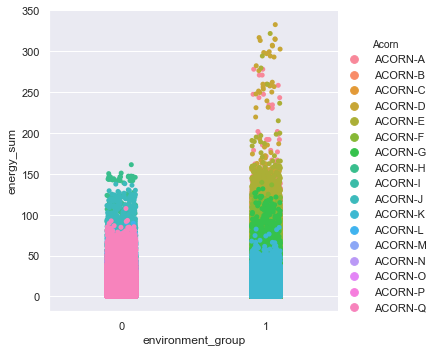

In [21]:
sns.catplot(x="environment_group", y="energy_sum", hue="Acorn", data=df)

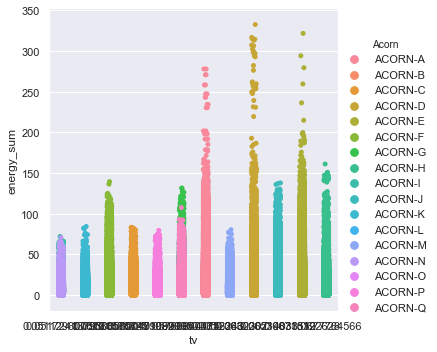

In [22]:
sns.catplot(x="tv", y="energy_sum", hue="Acorn", data=df)

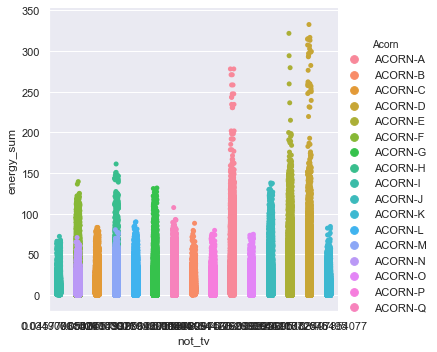

In [23]:
sns.catplot(x="not_tv", y="energy_sum", hue="Acorn", data=df)

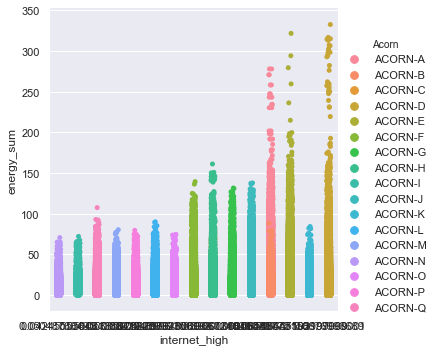

In [24]:
sns.catplot(x="internet_high", y="energy_sum", hue="Acorn", data=df)

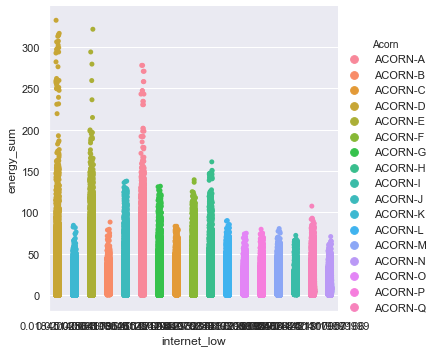

In [25]:
sns.catplot(x="internet_low", y="energy_sum", hue="Acorn", data=df)

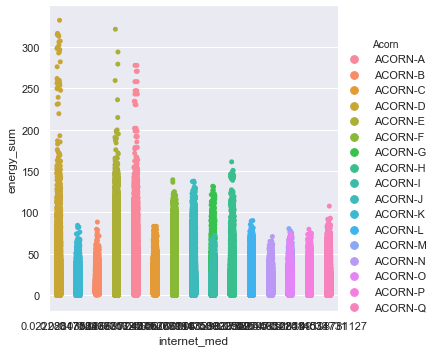

In [29]:
sns.catplot(x="internet_med", y="energy_sum", hue="Acorn", data=df)

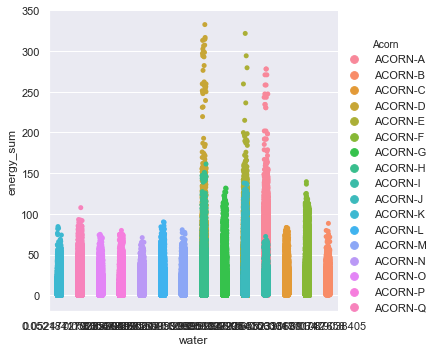

In [30]:
sns.catplot(x="water", y="energy_sum", hue="Acorn", data=df)

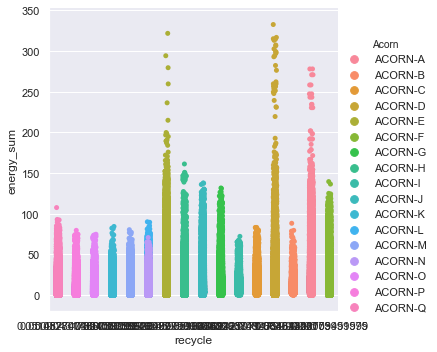

In [31]:
sns.catplot(x="recycle", y="energy_sum", hue="Acorn", data=df)

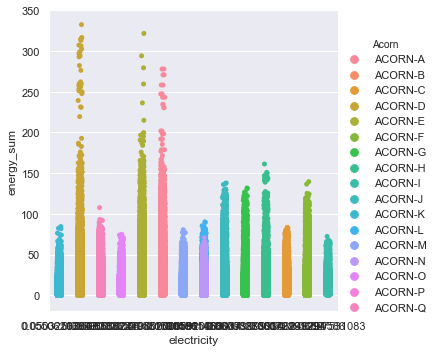

In [38]:
sns.catplot(x="electricity", y="energy_sum", hue="Acorn", data=df)

In [26]:
acorn_grouped = acorn_merge.drop('LCLid',axis=1).groupby('Acorn').mean().reset_index()
acorn_grouped

,Acorn,energy_sum,electricity,recycle,water,adult,child,elderly,attitude,car_0,...,60k-80k,80k-100k,<20k,>100k,average_level,internet_high,internet_low,internet_med,not_tv,tv
0,ACORN-A,19.732068,0.058171,0.064323,0.063031,0.048746,0.058293,0.071493,0,0.011593,...,0.117647,0.174914,0.011150,0.275769,0.113306,0.064831,0.040198,0.043906,0.060944,0.060048
1,ACORN-B,11.966894,0.059651,0.063011,0.064790,0.051596,0.057692,0.067270,0,0.013105,...,0.111176,0.142117,0.017606,0.179169,0.094712,0.064831,0.031960,0.035387,0.058083,0.065398
2,ACORN-C,11.977916,0.061723,0.062427,0.063618,0.048461,0.047776,0.093213,0,0.012097,...,0.078824,0.079402,0.038146,0.070696,0.067984,0.059667,0.049423,0.048493,0.050072,0.055886
3,ACORN-D,13.610702,0.055062,0.062865,0.059513,0.071266,0.050781,0.031373,0,0.104839,...,0.100000,0.120253,0.025235,0.144091,0.085997,0.067699,0.018451,0.022280,0.077825,0.063020
4,ACORN-E,10.373131,0.058022,0.058926,0.061566,0.064282,0.064303,0.035596,0,0.059476,...,0.089412,0.092060,0.032277,0.082029,0.073213,0.065404,0.025041,0.036697,0.076109,0.067182
5,ACORN-F,9.216813,0.062463,0.067095,0.063911,0.050741,0.051683,0.078733,0,0.024194,...,0.066471,0.057537,0.045775,0.039935,0.059849,0.059094,0.049753,0.053080,0.045780,0.052319
6,ACORN-G,10.201244,0.060539,0.060823,0.061272,0.054732,0.059796,0.062142,1,0.015625,...,0.083529,0.080552,0.035211,0.064220,0.068565,0.061388,0.042175,0.060288,0.056080,0.057669
7,ACORN-H,11.046642,0.060983,0.059802,0.059513,0.055160,0.060998,0.060332,0,0.023185,...,0.071176,0.062140,0.042840,0.043173,0.061592,0.059667,0.051071,0.062254,0.054649,0.067776
8,ACORN-I,9.474216,0.065275,0.060968,0.063031,0.044612,0.039062,0.121267,1,0.023690,...,0.034118,0.024166,0.076878,0.012952,0.043579,0.050488,0.093904,0.060288,0.034907,0.051130
9,ACORN-J,11.398446,0.059651,0.059947,0.061566,0.062286,0.064303,0.041629,0,0.024194,...,0.073529,0.063291,0.041080,0.042094,0.062173,0.062536,0.035255,0.057667,0.065236,0.065398


In [33]:
correlation = acorn_grouped.corr()
correlation.sort_values('energy_sum',ascending=False)

,energy_sum,electricity,recycle,water,adult,child,elderly,attitude,car_0,car_1,...,60k-80k,80k-100k,<20k,>100k,average_level,internet_high,internet_low,internet_med,not_tv,tv
energy_sum,1.000000,-0.012590,0.624347,0.526123,-0.124314,-0.276454,0.121154,-0.550104,-0.470348,-0.428172,...,0.771580,0.852708,-0.699209,0.897490,0.858703,0.515601,-0.493862,-0.578920,0.196651,0.317127
>100k,0.897490,-0.023249,0.627542,0.601039,-0.181082,-0.141166,0.062582,-0.504766,-0.417504,-0.632387,...,0.861806,0.962852,-0.749693,1.000000,0.948283,0.600020,-0.548844,-0.619791,0.223369,0.405620
average_level,0.858703,0.048274,0.736767,0.724451,-0.137248,-0.185552,0.026570,-0.624225,-0.575240,-0.618428,...,0.973788,0.992832,-0.919235,0.948283,1.000000,0.754762,-0.741072,-0.723938,0.272562,0.505535
80k-100k,0.852708,0.053327,0.730579,0.725426,-0.166319,-0.181207,0.047105,-0.600479,-0.537156,-0.662303,...,0.965242,1.000000,-0.878801,0.962852,0.992832,0.710269,-0.694347,-0.716994,0.253811,0.505357
bed_5,0.837838,-0.262519,0.411874,0.316694,0.110018,-0.264061,-0.022546,-0.455744,-0.274169,-0.565420,...,0.613629,0.732023,-0.559692,0.828766,0.744639,0.547534,-0.488044,-0.554449,0.307182,0.080079
saving,0.798389,0.101712,0.800828,0.780722,-0.068625,-0.436095,0.131863,-0.622851,-0.595875,-0.611099,...,0.949525,0.936626,-0.923919,0.863577,0.950969,0.764079,-0.779108,-0.837317,0.233461,0.363419
60k-80k,0.771580,0.112499,0.782051,0.786091,-0.122986,-0.212089,0.018516,-0.664371,-0.634109,-0.617775,...,1.000000,0.965242,-0.960034,0.861806,0.973788,0.786064,-0.804673,-0.761813,0.275994,0.560109
bed_4,0.701241,0.122187,0.666527,0.699136,-0.234880,-0.184715,0.177695,-0.507420,-0.586222,-0.753167,...,0.842557,0.892864,-0.768344,0.879071,0.885837,0.587922,-0.570074,-0.592348,0.068404,0.331053
recycle,0.624347,0.500559,1.000000,0.909541,-0.387545,-0.503435,0.479118,-0.568481,-0.763363,-0.455809,...,0.782051,0.730579,-0.753062,0.627542,0.736767,0.396080,-0.488786,-0.638154,-0.206299,0.140343
car_2,0.560492,0.546176,0.800914,0.882279,-0.468888,-0.234677,0.440969,-0.471638,-0.876405,-0.601382,...,0.779976,0.722653,-0.758857,0.612034,0.730680,0.415089,-0.478859,-0.429852,-0.247763,0.319211


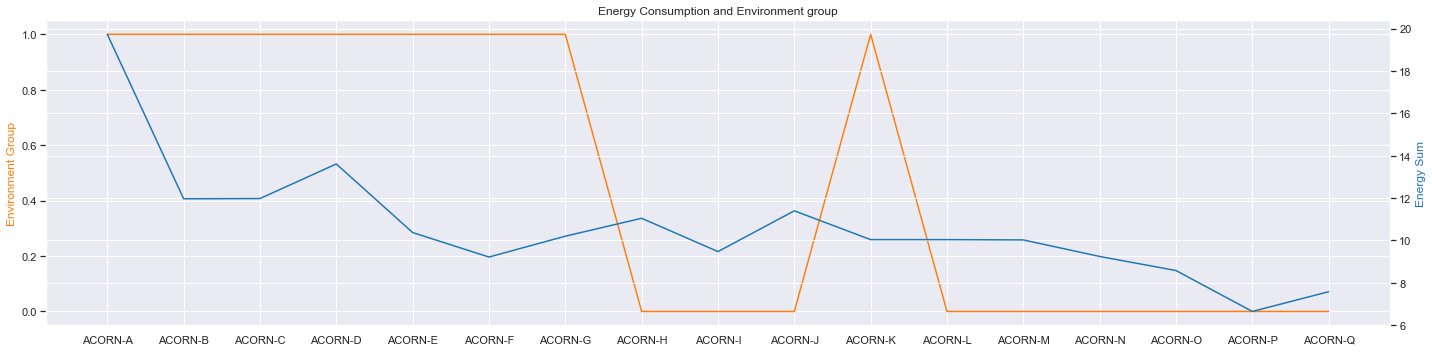

In [35]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(acorn_grouped.Acorn, acorn_grouped.environment_group, color = 'tab:orange')
ax1.set_ylabel('Environment Group',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(acorn_grouped.Acorn,acorn_grouped.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Energy Sum',color = 'tab:blue')
plt.title('Energy Consumption and Environment group')
fig.tight_layout()
plt.show()

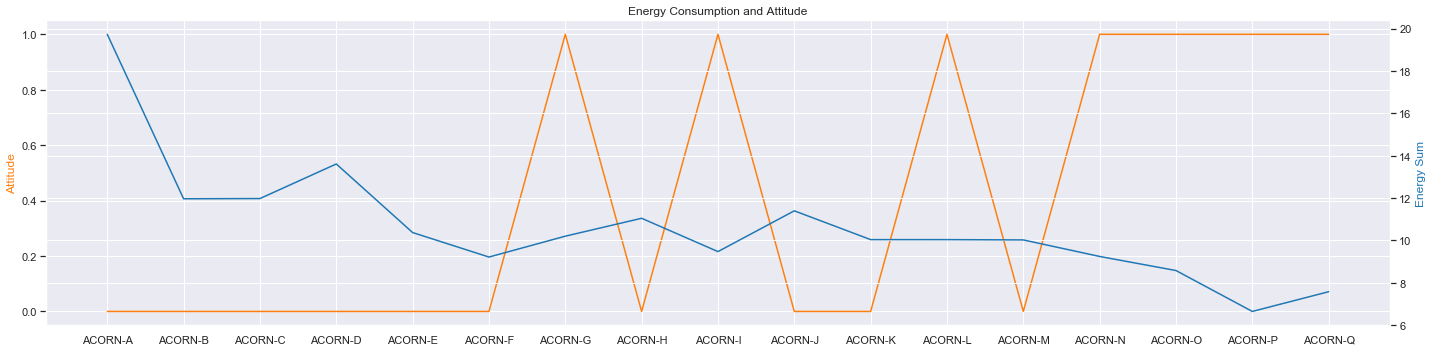

In [43]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(acorn_grouped.Acorn, acorn_grouped.attitude, color = 'tab:orange')
ax1.set_ylabel('Attitude',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(acorn_grouped.Acorn,acorn_grouped.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Energy Sum',color = 'tab:blue')
plt.title('Energy Consumption and Attitude')
fig.tight_layout()
plt.show()

In [44]:
corr_df = acorn_grouped[['Acorn','energy_sum','attitude', 'environment_group', 'tv','internet_high', 
                  'internet_low', 'internet_med','not_tv','water','electricity','recycle']]
corr_df.corr(method='pearson') 

,energy_sum,attitude,environment_group,tv,internet_high,internet_low,internet_med,not_tv,water,electricity,recycle
energy_sum,1.000000,-0.550104,0.501963,0.317127,0.515601,-0.493862,-0.578920,0.196651,0.526123,-0.012590,0.624347
attitude,-0.550104,1.000000,-0.549350,-0.484508,-0.652452,0.705867,0.683741,-0.399397,-0.483342,0.117698,-0.568481
environment_group,0.501963,-0.549350,1.000000,0.058372,0.706494,-0.730765,-0.819357,0.385875,0.526971,-0.171977,0.616515
tv,0.317127,-0.484508,0.058372,1.000000,0.511698,-0.487872,-0.218549,0.392384,0.277873,-0.039686,0.140343
internet_high,0.515601,-0.652452,0.706494,0.511698,1.000000,-0.981363,-0.763336,0.713308,0.370181,-0.372895,0.396080
internet_low,-0.493862,0.705867,-0.730765,-0.487872,-0.981363,1.000000,0.813828,-0.657688,-0.452316,0.281595,-0.488786
internet_med,-0.578920,0.683741,-0.819357,-0.218549,-0.763336,0.813828,1.000000,-0.499963,-0.540035,0.206821,-0.638154
not_tv,0.196651,-0.399397,0.385875,0.392384,0.713308,-0.657688,-0.499963,1.000000,-0.283365,-0.860296,-0.206299
water,0.526123,-0.483342,0.526971,0.277873,0.370181,-0.452316,-0.540035,-0.283365,1.000000,0.647791,0.909541
electricity,-0.012590,0.117698,-0.171977,-0.039686,-0.372895,0.281595,0.206821,-0.860296,0.647791,1.000000,0.500559


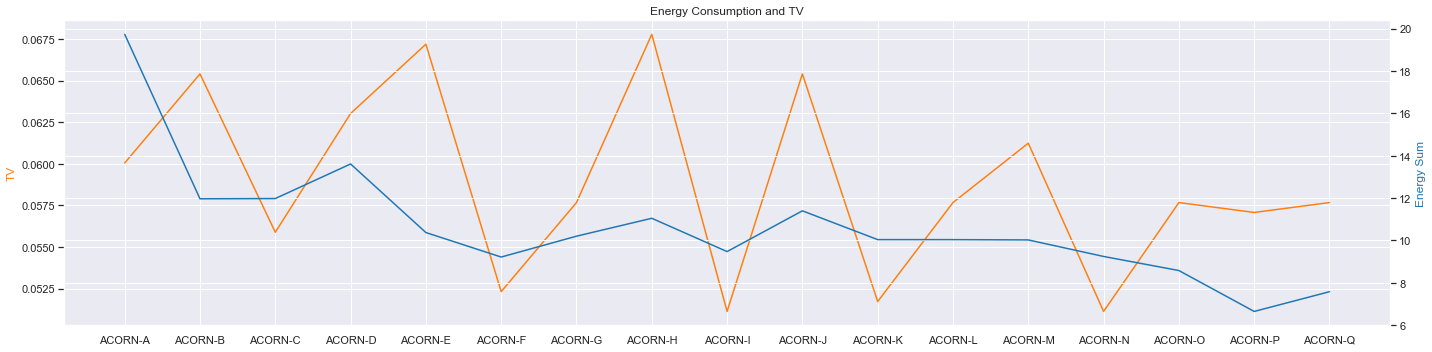

In [45]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(acorn_grouped.Acorn, acorn_grouped.tv, color = 'tab:orange')
ax1.set_ylabel('TV',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(acorn_grouped.Acorn,acorn_grouped.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Energy Sum',color = 'tab:blue')
plt.title('Energy Consumption and TV')
fig.tight_layout()
plt.show()

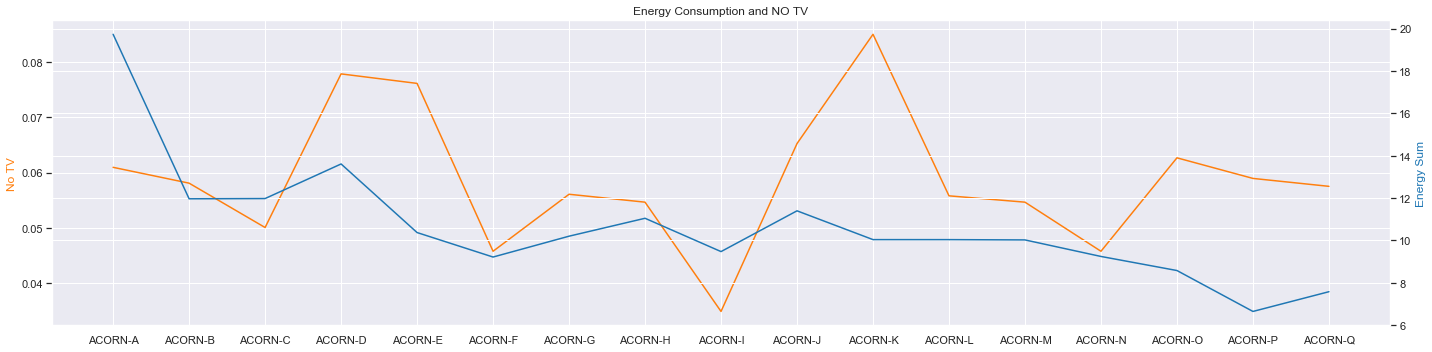

In [47]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(acorn_grouped.Acorn, acorn_grouped.not_tv, color = 'tab:orange')
ax1.set_ylabel('No TV',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(acorn_grouped.Acorn,acorn_grouped.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Energy Sum',color = 'tab:blue')
plt.title('Energy Consumption and NO TV')
fig.tight_layout()
plt.show()

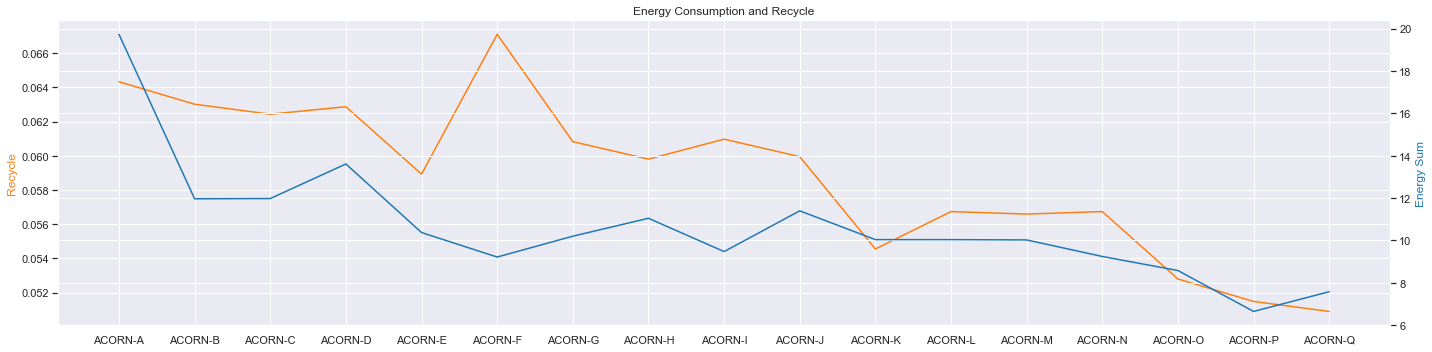

In [53]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(acorn_grouped.Acorn, acorn_grouped.recycle, color = 'tab:orange')
ax1.set_ylabel('Recycle',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(acorn_grouped.Acorn,acorn_grouped.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Energy Sum',color = 'tab:blue')
plt.title('Energy Consumption and Recycle')
fig.tight_layout()
plt.show()

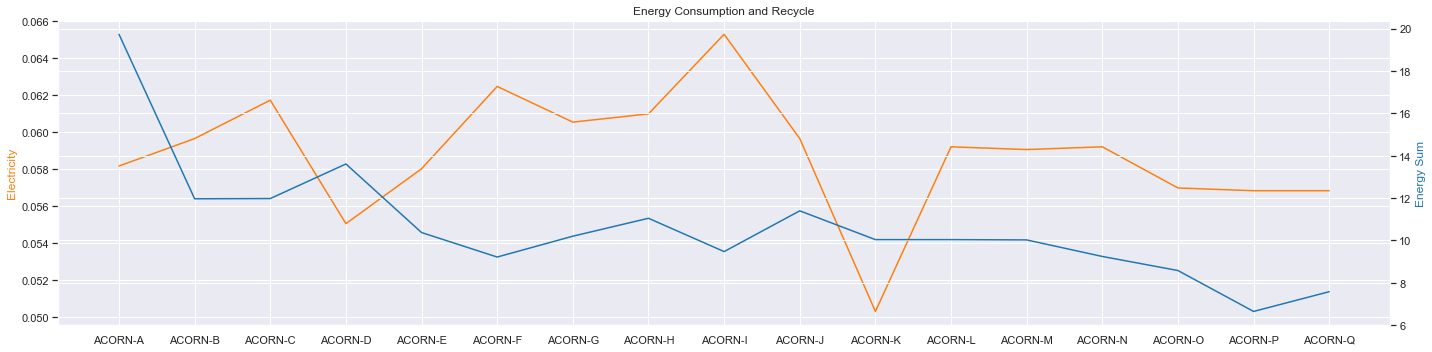

In [52]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(acorn_grouped.Acorn, acorn_grouped.electricity, color = 'tab:orange')
ax1.set_ylabel('Electricity',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(acorn_grouped.Acorn,acorn_grouped.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Energy Sum',color = 'tab:blue')
plt.title('Energy Consumption and Recycle')
fig.tight_layout()
plt.show()

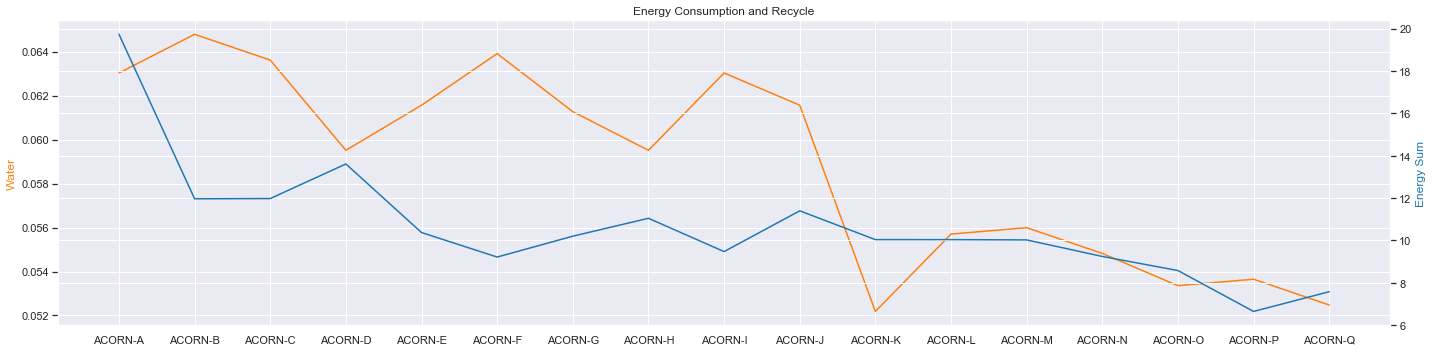

In [51]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(acorn_grouped.Acorn, acorn_grouped.water, color = 'tab:orange')
ax1.set_ylabel('Water',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(acorn_grouped.Acorn,acorn_grouped.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Energy Sum',color = 'tab:blue')
plt.title('Energy Consumption and Recycle')
fig.tight_layout()
plt.show()

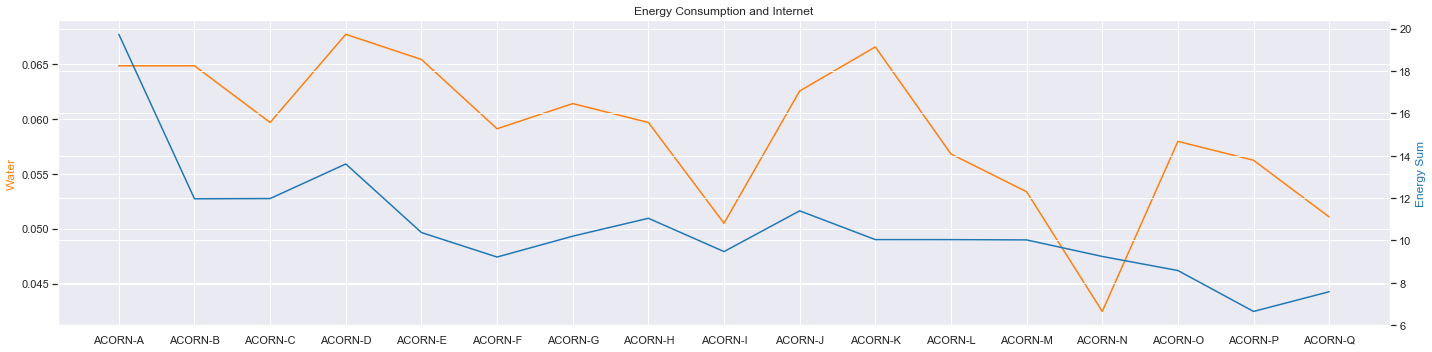

In [55]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(acorn_grouped.Acorn, acorn_grouped.internet_high, color = 'tab:orange')
ax1.set_ylabel('High Internet',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(acorn_grouped.Acorn,acorn_grouped.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Energy Sum',color = 'tab:blue')
plt.title('Energy Consumption and Internet')
fig.tight_layout()
plt.show()

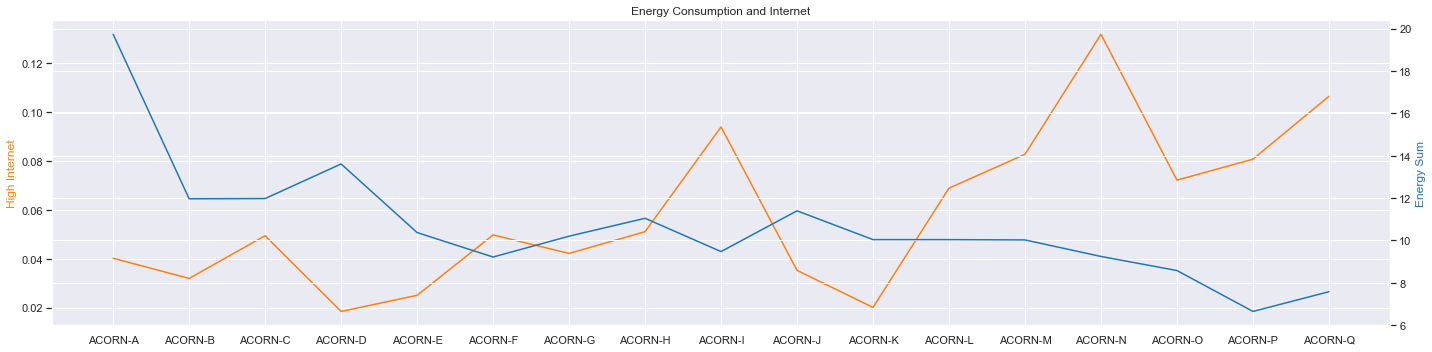

In [56]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(acorn_grouped.Acorn, acorn_grouped.internet_low, color = 'tab:orange')
ax1.set_ylabel('High Internet',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(acorn_grouped.Acorn,acorn_grouped.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Energy Sum',color = 'tab:blue')
plt.title('Energy Consumption and Internet')
fig.tight_layout()
plt.show()

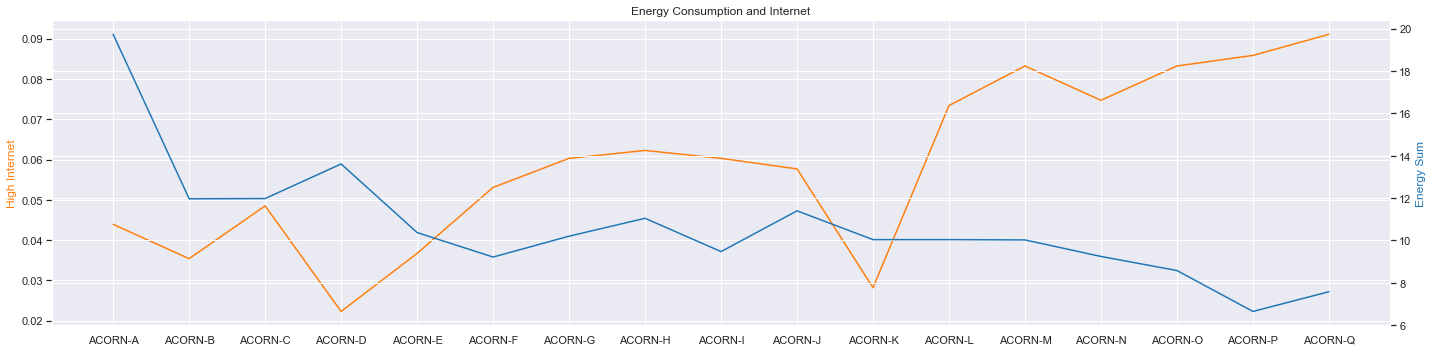

In [57]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(acorn_grouped.Acorn, acorn_grouped.internet_med, color = 'tab:orange')
ax1.set_ylabel('High Internet',color = 'tab:orange')
ax2 = ax1.twinx()
ax2.plot(acorn_grouped.Acorn,acorn_grouped.energy_sum,color = 'tab:blue')
ax2.set_ylabel('Energy Sum',color = 'tab:blue')
plt.title('Energy Consumption and Internet')
fig.tight_layout()
plt.show()